In [121]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import pandas as pd
from sklearn import svm, metrics, model_selection, linear_model
from datetime import date, timedelta
import datetime
import pytz

In [122]:
url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/'
daily='csse_covid_19_daily_reports/' #+date in the form  01-22-2020.csv
daily_us='csse_covid_19_daily_reports_us/' #+date in the form  01-22-2020.csv
time_serie='csse_covid_19_time_series/' #+confirmed, death,recovered
confirmed_data='time_series_covid19_confirmed_global.csv'
death_data='time_series_covid19_deaths_global.csv'
recovered_data='time_series_covid19_recovered_global.csv'

In [123]:
pop_us=pd.read_csv('nst-est2019-alldata.csv')

pop_us=pop_us[['NAME','POPESTIMATE2019']]
pop_us.set_index('NAME',inplace=True)
#print(pop_us)
#print(pop_us['NAME'])
i=pop_us.loc['Hawaii','POPESTIMATE2019']
print(i)
print(pop_us.index)

1415872
Index(['United States', 'Northeast Region', 'Midwest Region', 'South Region',
       'West Region', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype='object', name='NAME')


In [124]:
def make_date(a,b,c,d): 
    #convert a date in (day,month) format to a string to feed in the read_csv function
    day=str(a*10+b)
    month=str(10*c+d)
    if len(day)==1:
        day='0'+day
    if len(month)==1:
        month='0'+month 
    date=month+'-'+day+'-2020'
    return date
today = str(date.today())
a=int(today[5])
b=int(today[6])
c=int(today[8])
d=int(today[9])
today=make_date(c,d,a,b)
print(today)
def add_xday(a,b,c,d,x):
    day=c*10+d
    month=10*a+b
    if month==4 or month==6:
        endmonth=30
    else:
        endmonth=31
    newday=day+x
    if newday>endmonth:
        month+=1
        newday=newday-endmonth
    a=int(newday/10)
    b=newday-a*10  
    return make_date(a,b,0,month)
print(make_date(1,4,0,2))
def subdate (date):
    a=date[0]
    b=date[1]
    c=date[3]
    d=date[4]
    return '2020-'+a+b+'-'+c+d
print(subdate(today))

todayplus2=add_xday(a,b,c,d,2)
todayplusweek=add_xday(a,b,c,d,7)
print(today,todayplus2,todayplusweek)

06-22-2020
02-14-2020
2020-06-22
06-22-2020 06-24-2020 06-29-2020


In [125]:
print(today[3:5])

22


In [126]:
#This cell save the data for the us in a dictionary us_data. Pay attention to adjuste to if statement to
#adjust it at the current date. The value of the dict are dataframe with: first ligne:confirme case, second: dead, 
#third: recovered. the columns are the different dates
us_data={}
total_state=[]
for month in range(1,7):
    for day in range(1,32):
        if month==1 and day<23:
            pass
        elif month==2 and day>29:
            pass
        elif month==4 and day>7:
            pass
        elif month==6 and day>(int(today[3:5])-1):
            pass
        else:
            a=int(day/10)
            dat=make_date(a,day-a*10,0,month)
            #print(dat)
            Daily=daily
            if day>13 and month>3:
                Daily=daily_us  
        
            today_data=pd.read_csv(url+Daily+dat+'.csv')
            if month<3 or (month==3 and day<22):
                st='Province/State'
                country='Country/Region'
            else:
                st='Province_State'
                country='Country_Region'
            for i, state in enumerate(today_data[st]):
                if today_data[country].iloc[i]!='US':
                    pass
                if state not in pop_us.index:
                    pass
                else:
                    N=pop_us.loc[state,'POPESTIMATE2019']
                    R=today_data['Recovered'].iloc[i]
                    I=today_data['Confirmed'].iloc[i]
                    D=today_data['Deaths'].iloc[i]
                    S=N-R-I-D
                    SI=S*I
                    if state not in total_state:
                        total_state.append(state)
                        us_data[state]=pd.DataFrame()
                        us_data[state][dat]=np.array([S,I,SI,R,D])
                        
                    elif dat not in us_data[state].columns:
                        us_data[state][dat]=np.array([S,I,SI,R,D])
                        
                    else:
                        us_data[state][dat]+=np.array([S,I,SI,R,D])
                        
                        
                    
  


Index(['United States', 'Northeast Region', 'Midwest Region', 'South Region',
       'West Region', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype='object', name='NAME')


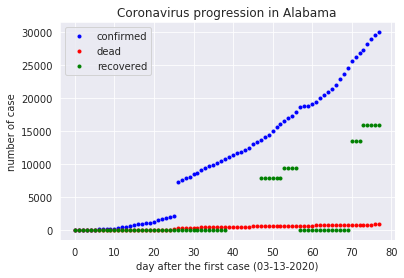

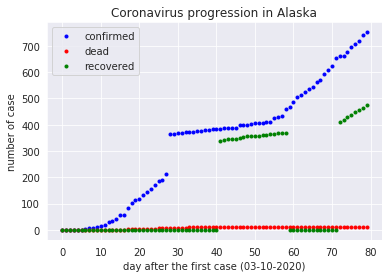

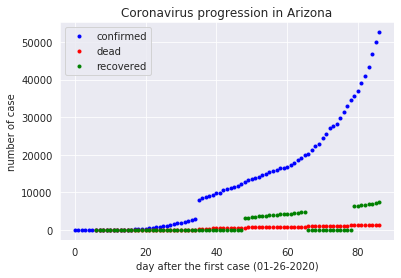

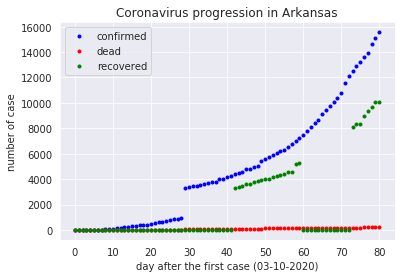

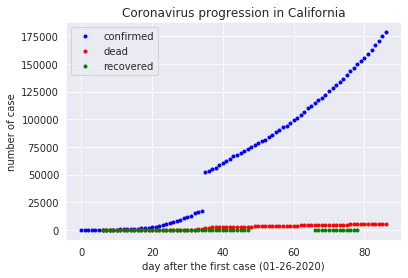

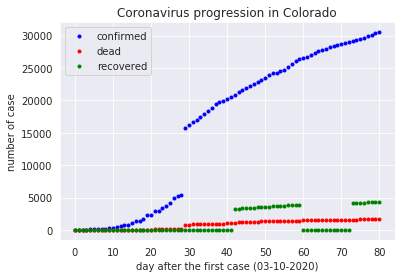

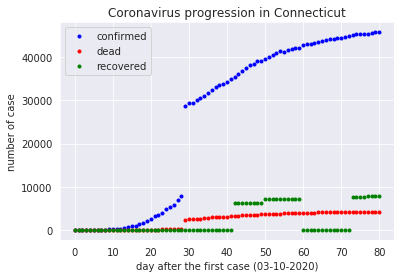

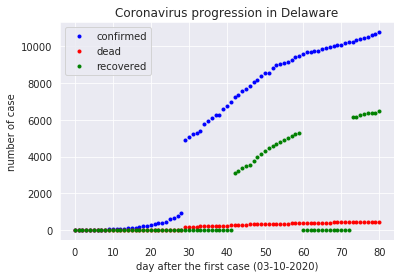

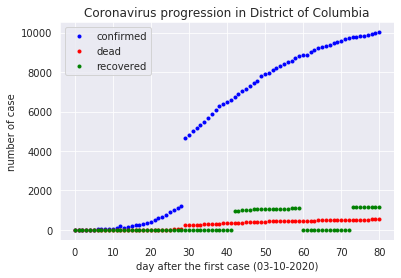

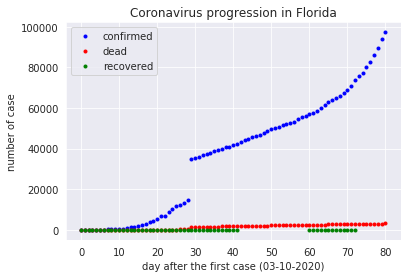

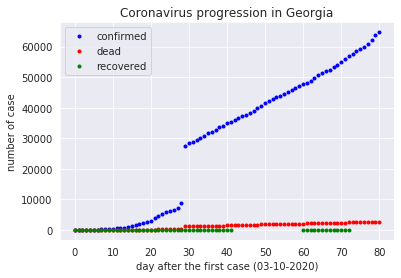

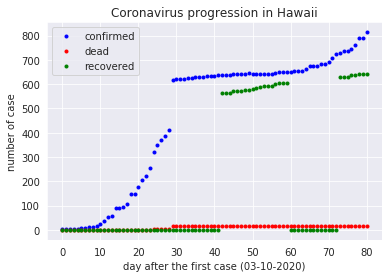

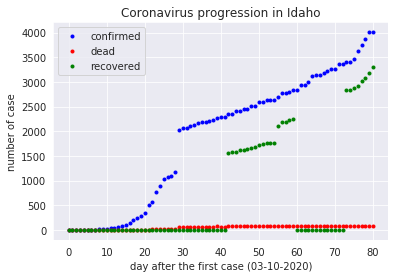

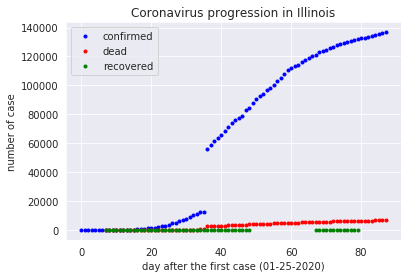

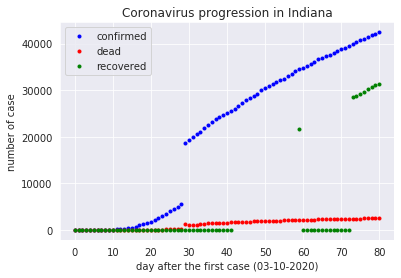

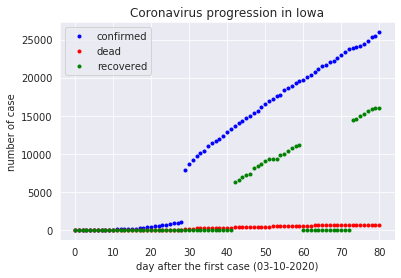

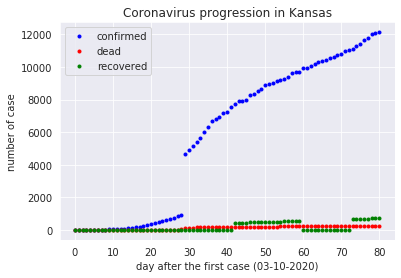

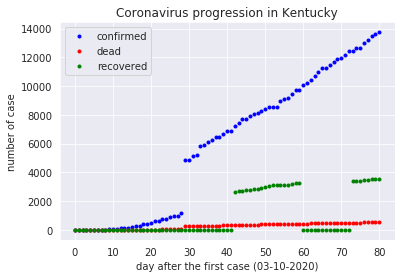

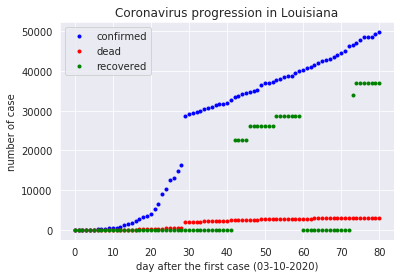

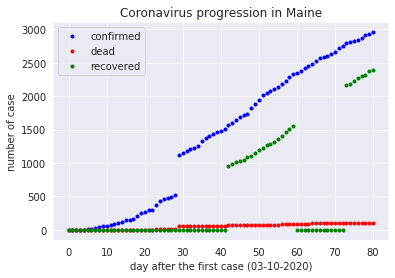

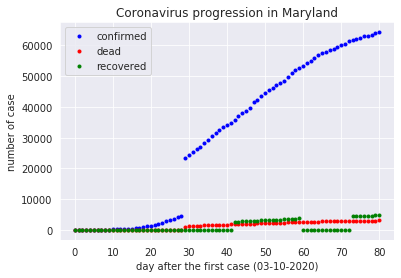

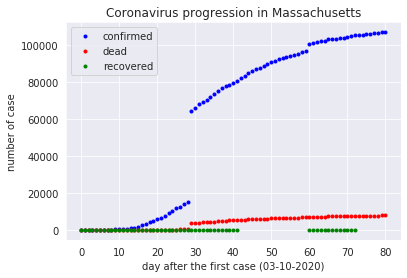

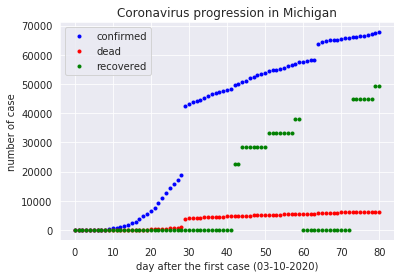

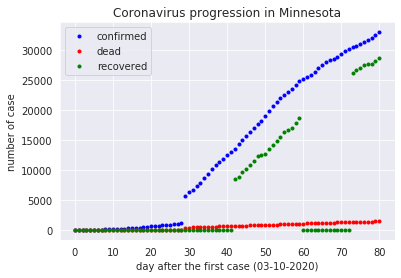

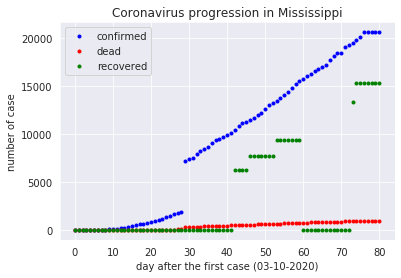

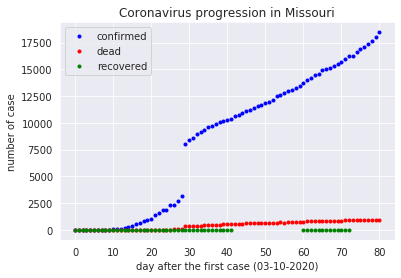

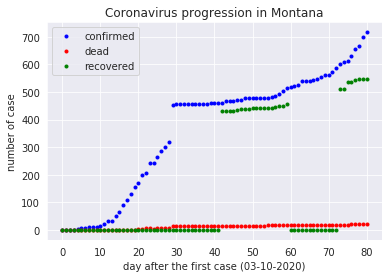

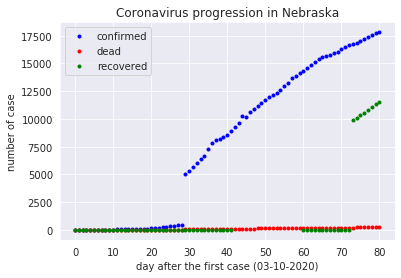

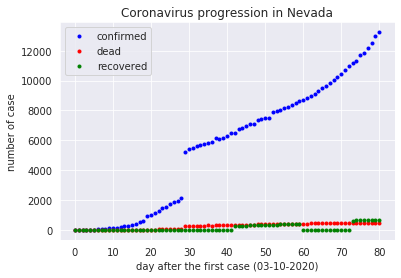

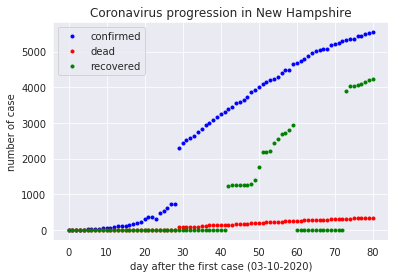

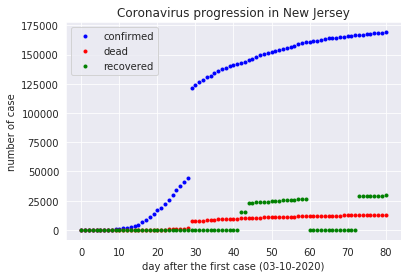

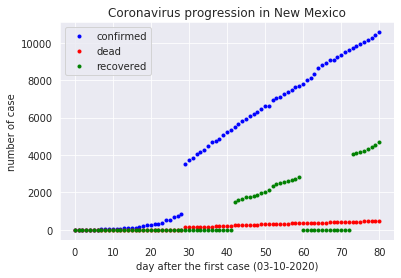

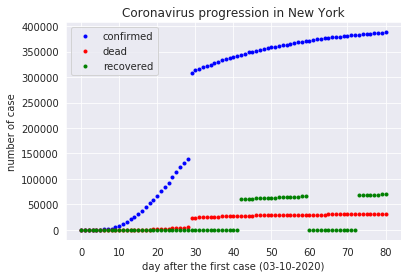

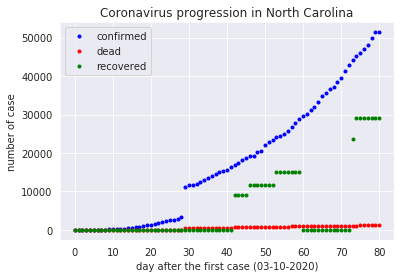

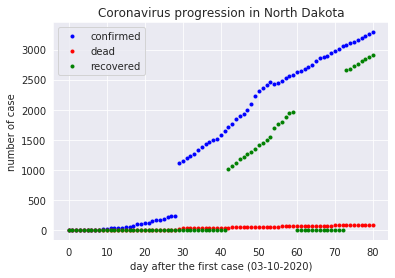

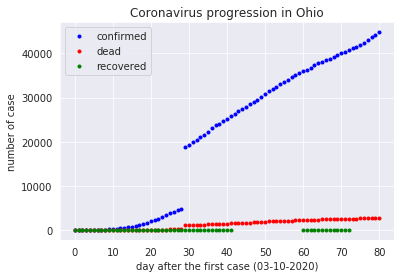

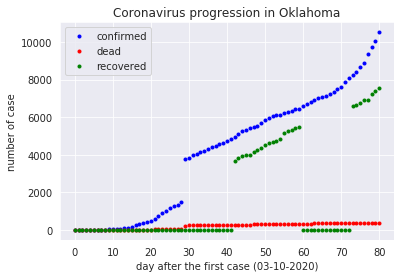

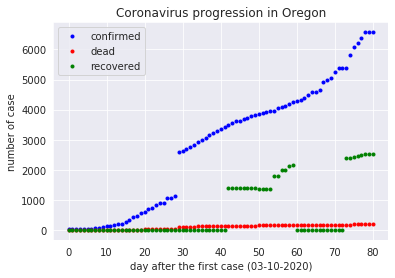

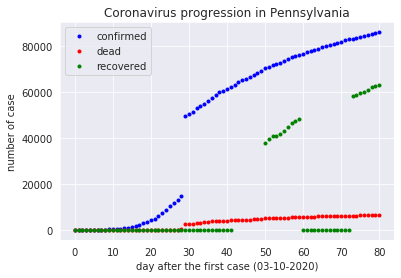

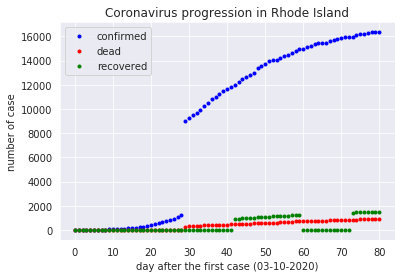

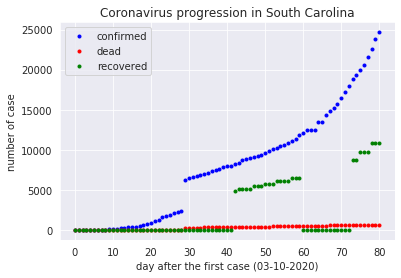

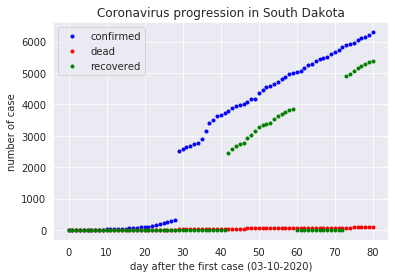

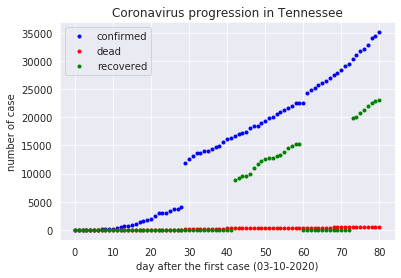

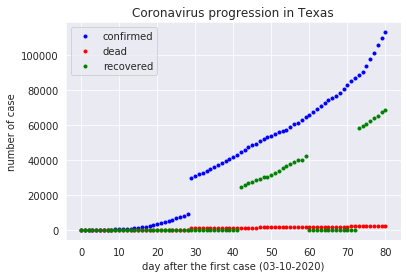

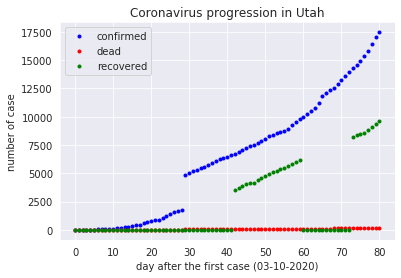

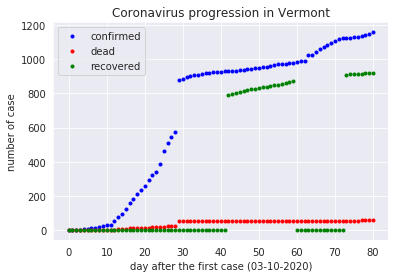

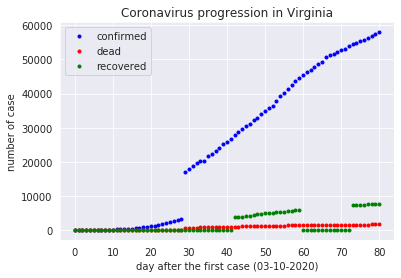

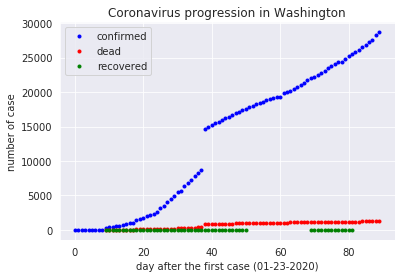

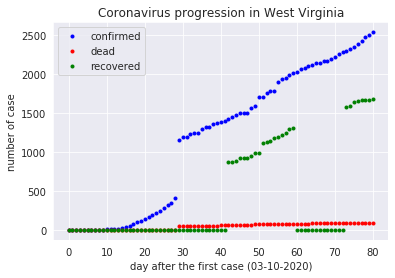

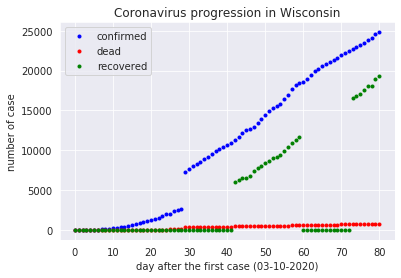

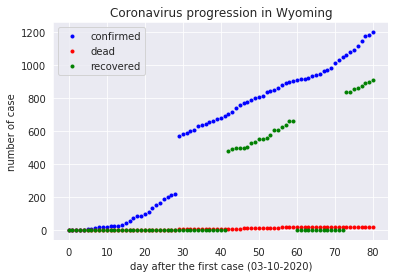

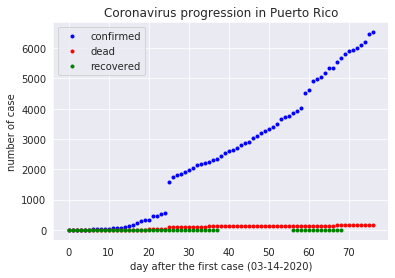

In [127]:
print(pop_us.index)
for state in pop_us.index[5:]:
    time=np.arange(len(us_data[state].iloc[0,:]))
    plt.figure()
    plt.title('Coronavirus progression in '+state)
    plt.xlabel('day after the first case ('+us_data[state].columns[0]+')')
    plt.ylabel('number of case')
    plt.plot(time,us_data[state].iloc[1,:],'b.',label='confirmed')
    plt.plot(time,us_data[state].iloc[4,:],'r.',label='dead')
    plt.plot(time,us_data[state].iloc[3,:],'g.',label='recovered')
    plt.legend()
    #plt.xlim()
    plt.show()

In [128]:
prediction_2days_us=pd.DataFrame()
prediction_7days_us=pd.DataFrame()
prediction_2days_us['Province/State']=pop_us.index[5:]
prediction_7days_us['Province/State']=pop_us.index[5:]
Date2=[]
Date7=[]
US=[]
n=len(pop_us.index[5:])
zero=np.zeros((n))
for i in range(n):
    US.append('US')
    Date2.append(subdate(todayplus2))
    Date7.append(subdate(todayplusweek))
prediction_2days_us['Country']=US
prediction_2days_us['Target/Date']=Date2
prediction_2days_us['N']=zero
prediction_2days_us['R']=zero
prediction_2days_us['D']=zero

prediction_7days_us['Country']=US
prediction_7days_us['Target/Date']=Date7
prediction_7days_us['N']=zero
prediction_7days_us['R']=zero
prediction_7days_us['D']=zero

#print(prediction_2days_us)

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.97275099340345e+17, tolerance: 200910305546158.0
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12660532.56130356, tolerance: 657444.6471220779
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.554776817254181e+21, tolerance: 1.7828545273518348e+19
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase

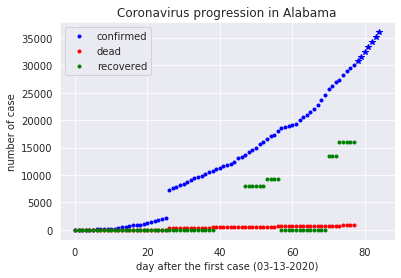

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 540707109445688.8, tolerance: 408959999024.5796
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12470.936947016962, tolerance: 387.5522303797469
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6519626610678634.0, tolerance: 206958012539870.66
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

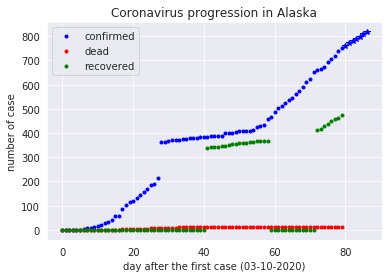

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.129862347012263e+16, tolerance: 25904123765075.91
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13937855.289509818, tolerance: 1586679.0986093027
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.402160253273241e+20, tolerance: 8.314929432088404e+19
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increa

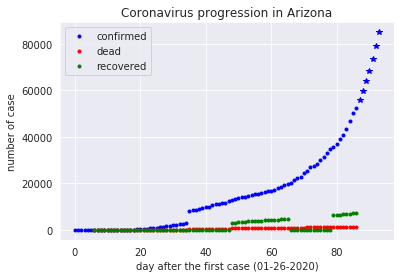

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.467965956754206e+16, tolerance: 93163225235275.84
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2907382.840844216, tolerance: 159359.35269874998
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6644896789941567e+19, tolerance: 1.436128404147966e+18
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increa

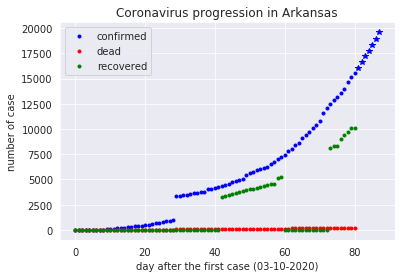

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.600942614590614e+18, tolerance: 1.0523656548299912e+16
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 545736743.4809159, tolerance: 28231784.027334888
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.08142672180155e+25, tolerance: 3.057398900313041e+22
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to inc

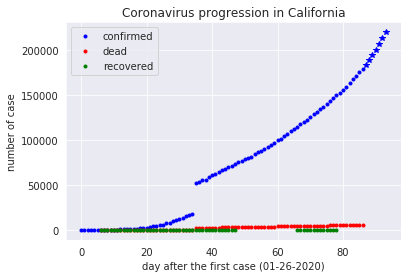

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.302104101809496e+17, tolerance: 231211295899727.88
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47558866.31589825, tolerance: 1036948.0038000001
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5779604445578223e+21, tolerance: 3.413627347086186e+19
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to incre

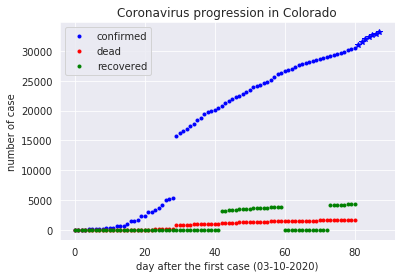

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1428826822740556.5, tolerance: 1552822039880.8667
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 172801342.19098505, tolerance: 2746085.8671887503
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.184052781760887e+21, tolerance: 3.418429010686235e+19
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase

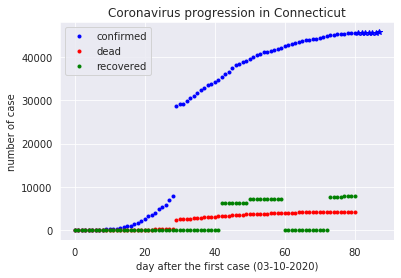

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15861613019839.947, tolerance: 15406777657.985542
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7135705.722350935, tolerance: 141305.90878
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.727534003610691e+18, tolerance: 1.3101341028835992e+17
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the n

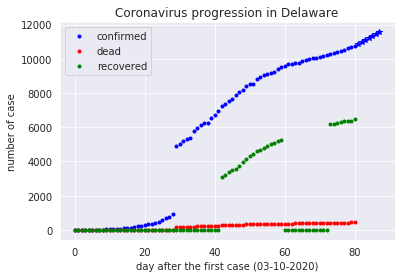

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 238029064101.48648, tolerance: 50149329.10484875
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4445895.221251424, tolerance: 120499.56779875
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.181880839486663e+18, tolerance: 5.824509249398178e+16
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the 

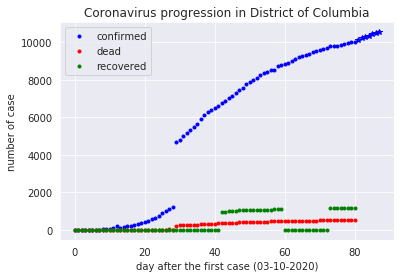

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.9650272238888504e+18, tolerance: 4062450736165582.0
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 171473891.59697923, tolerance: 6330672.066155001
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3219709950427885e+24, tolerance: 2.2168733342750923e+21
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to inc

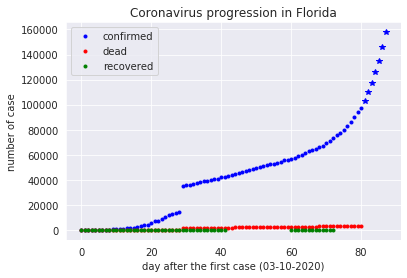

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.399435411024152e+18, tolerance: 5598672144046306.0
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 158745092.28945845, tolerance: 3838055.89893875
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.773708875976035e+23, tolerance: 3.6056303270285155e+20
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increa

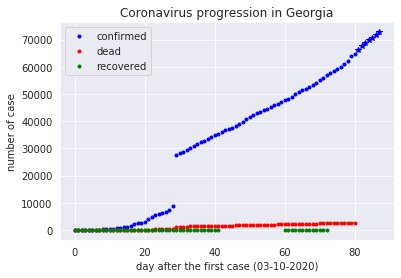

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87401241040008.72, tolerance: 95986035596.64291
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22336.726493708913, tolerance: 585.6228
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.245349090231645e+16, tolerance: 1172374838647058.5
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of 

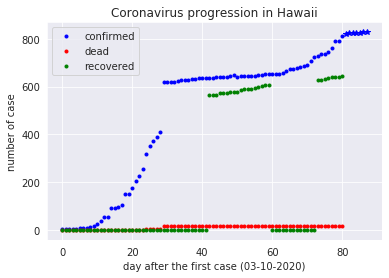

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9109585353270536.0, tolerance: 8621918366917.69
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 339659.07831245026, tolerance: 13092.92949875
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0802410913313504e+18, tolerance: 4.162563717815936e+16
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the 

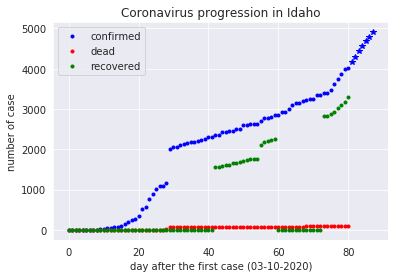

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3008810239673953e+18, tolerance: 3270049350249637.5
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 877589371.3187582, tolerance: 25739377.842889655
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.965076742781738e+24, tolerance: 3.107886358542593e+21
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to incre

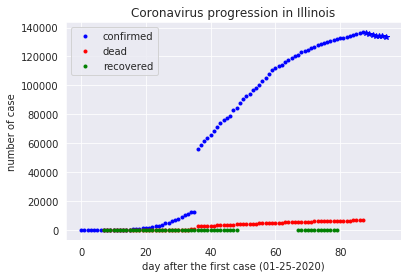

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.03977287069325e+17, tolerance: 747843576774213.2
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69411725.60934724, tolerance: 1943565.2082199997
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.945300028818877e+22, tolerance: 9.973644989952996e+19
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase

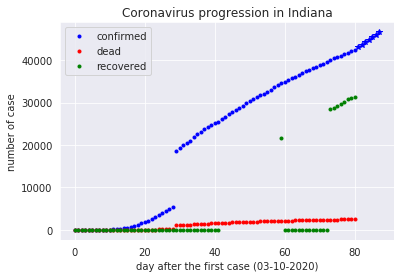

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8514869478478352e+17, tolerance: 171565714565036.88
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22383333.414557386, tolerance: 687770.79523875
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2393805763398356e+20, tolerance: 6.749154931623798e+18
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increa

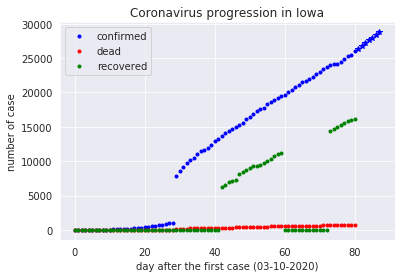

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.553005250632387e+17, tolerance: 131934174445054.72
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6606267.011797311, tolerance: 160316.12415500003
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.601746547308399e+19, tolerance: 1.353715070011154e+18
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increa

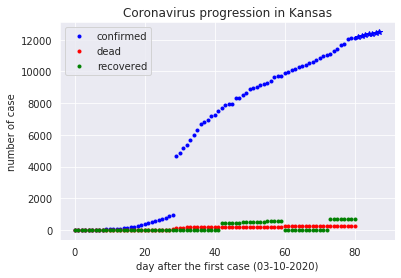

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.4306506378293805e+17, tolerance: 496487919955014.4
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6856155.281330892, tolerance: 179870.16454875
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3668645899295665e+20, tolerance: 3.574278597706687e+18
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase

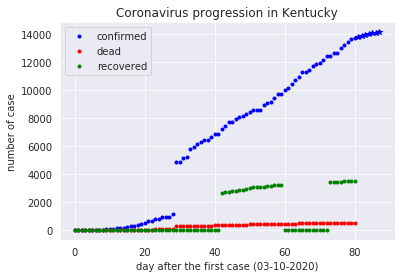

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6451885014105968e+17, tolerance: 173159165907675.66
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60573658.293658994, tolerance: 2441091.3767887503
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3600546246319952e+21, tolerance: 5.161901022787618e+19
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to inc

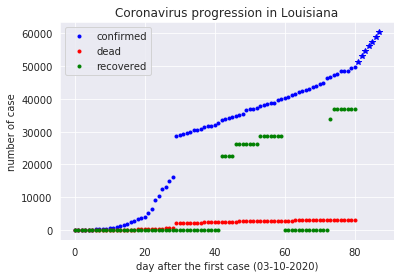

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 880669578012900.4, tolerance: 882421235930.8439
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 171245.99462785697, tolerance: 8348.771955
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.104434897917062e+17, tolerance: 1.5012176699613738e+16
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the num

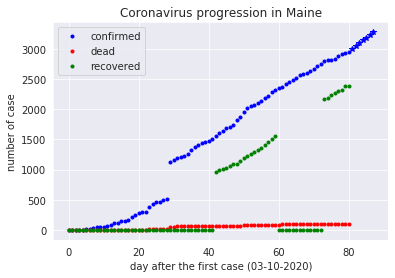

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.7689877599477656e+16, tolerance: 41117692938706.79
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 170169251.8062367, tolerance: 4657387.393198751
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.260084462233435e+21, tolerance: 1.678912115580718e+20
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increas

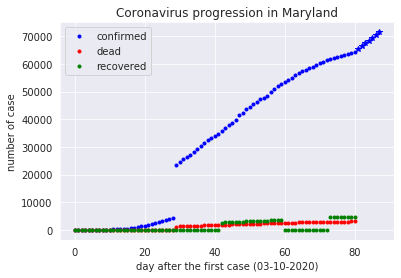

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.862922002557309e+16, tolerance: 19072282166852.19
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1071536497.3845844, tolerance: 14929956.637020001
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.616401143017873e+23, tolerance: 6.487505407744792e+20
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increa

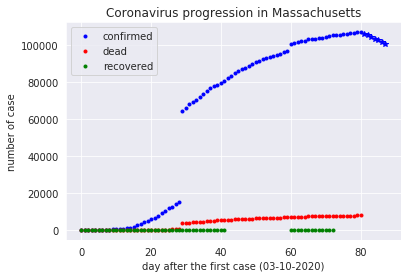

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2963957003613952e+18, tolerance: 1320167039714388.8
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 221551261.0832226, tolerance: 5171189.262795
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2213981515750257e+22, tolerance: 5.08884604314584e+20
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase 

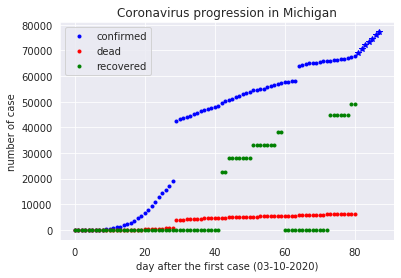

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.508460311137499e+17, tolerance: 416202636776655.7
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11168715.822239857, tolerance: 1122624.05258
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.634567166799072e+20, tolerance: 3.528034933701943e+19
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase th

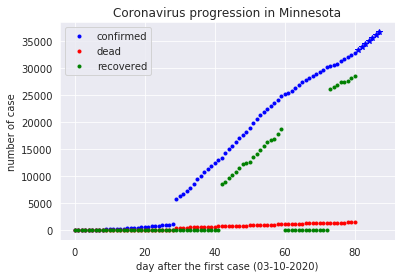

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0779964845881477e+17, tolerance: 113761521638142.55
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13347172.148482958, tolerance: 428247.42120000004
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1929606459080296e+20, tolerance: 3.7429950714092836e+18
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to in

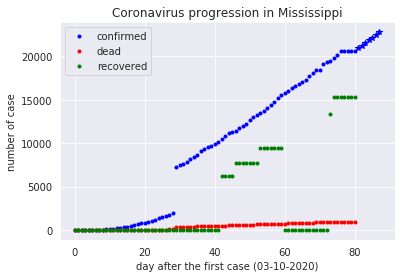

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.822407503499246e+17, tolerance: 791120136064945.6
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10424380.264504239, tolerance: 311357.67058875
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0407725095180034e+22, tolerance: 1.0127820715461724e+19
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increas

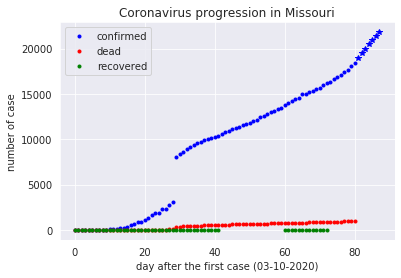

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3913759273058224.5, tolerance: 3373402593226.2964
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10473.065060315002, tolerance: 363.434955
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0975011161519388e+16, tolerance: 414561047086571.25
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cav

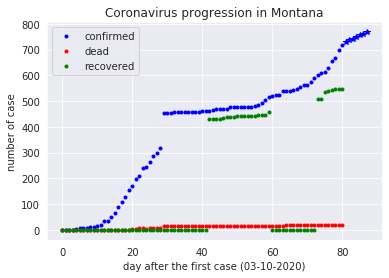

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.6648449222407064e+16, tolerance: 44178743140955.27
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10339300.788569704, tolerance: 351252.81783875
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.3993487951514265e+20, tolerance: 1.4236716846560617e+18
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increa

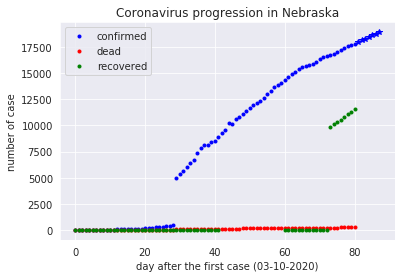

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5274567551371544.0, tolerance: 4596533413163.986
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4610967.644182004, tolerance: 135188.510195
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.372502299874608e+19, tolerance: 1.2739146559941532e+18
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the n

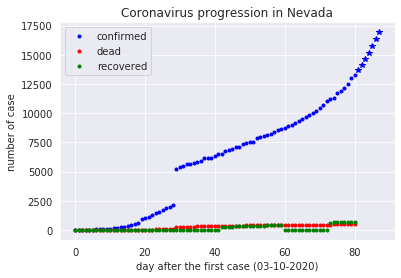

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 347301594109190.75, tolerance: 352694659510.1012
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1167882.3514318054, tolerance: 33974.144955
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1525041988796227e+18, tolerance: 6.2265463919851016e+16
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the 

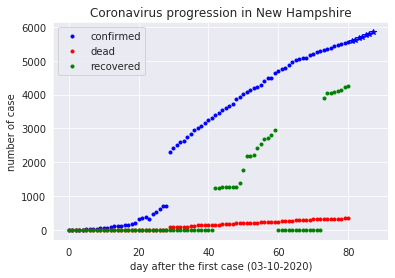

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.4206082592772536e+16, tolerance: 69216764539240.14
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2417012655.3377423, tolerance: 37780303.975320004
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.903232396810154e+23, tolerance: 2.900585624289375e+21
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to incre

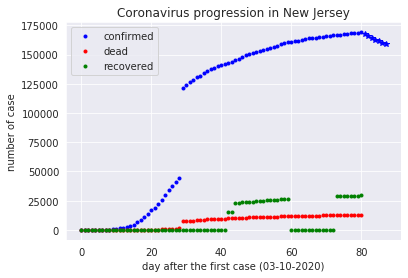

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9138582621758766.0, tolerance: 8285607311579.07
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3154036.595876528, tolerance: 110813.98019500001
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3879844208804215e+19, tolerance: 4.832026793540896e+17
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase t

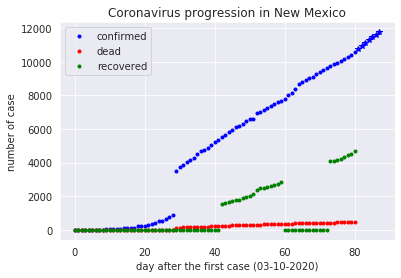

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4399282257413e+18, tolerance: 2604282980109355.5
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10745955423.770655, tolerance: 188656325.62869877
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.0142249642164233e+24, tolerance: 6.893049905974114e+22
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increa

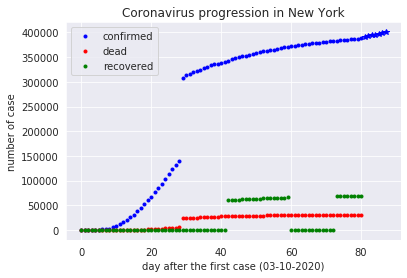

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.041790604014942e+18, tolerance: 2077285902507068.2
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30481706.19984387, tolerance: 2045641.9047199998
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.373254252510928e+21, tolerance: 2.229644591613708e+20
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increa

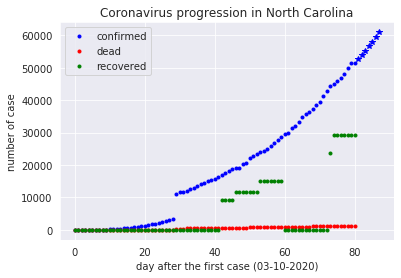

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2475555506232832.0, tolerance: 2103884459337.7034
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 374833.96696001943, tolerance: 11446.40288
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.178372230512654e+17, tolerance: 6581018329509834.0
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

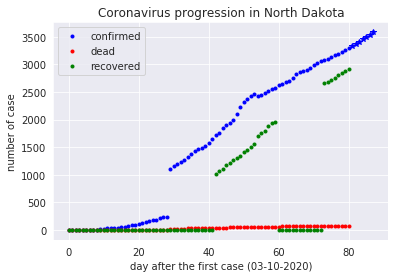

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0065218225008243e+18, tolerance: 2032049195797823.2
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88026419.53548141, tolerance: 2069355.2295950006
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.439825304369535e+23, tolerance: 2.3644735828982907e+20
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to incr

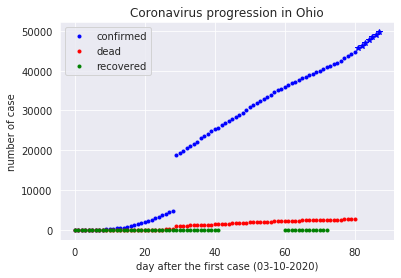

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.678084456207842e+17, tolerance: 160633473317518.44
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2409019.047047246, tolerance: 79184.28581875001
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.773748927283505e+19, tolerance: 1.233257566050969e+18
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increas

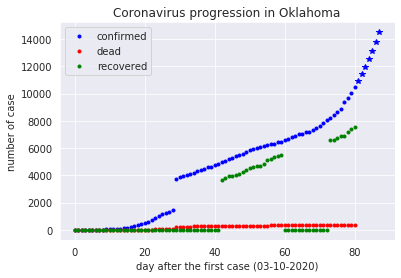

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.855527203543258e+16, tolerance: 37719214244273.914
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1063941.767049956, tolerance: 33445.689155
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8924819823653745e+19, tolerance: 5.93321032637347e+17
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the

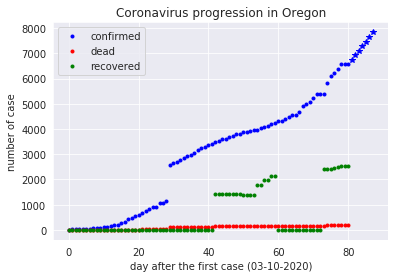

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.359376607586444e+18, tolerance: 1429252295724304.0
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 518450152.86717653, tolerance: 9018449.34776875
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.50101854302397e+23, tolerance: 1.6503374885384626e+21
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increas

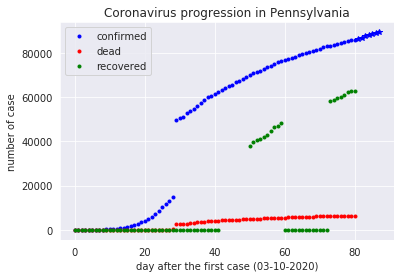

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52064627415604.04, tolerance: 55861637995.66754
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27856766.947501786, tolerance: 352991.455595
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.0960833605668594e+19, tolerance: 3.860177700092564e+17
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the n

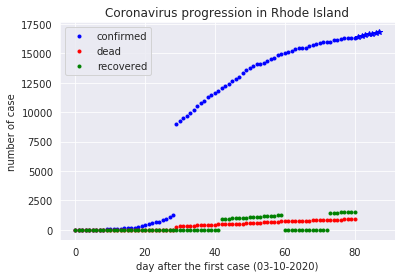

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0245335820475411e+17, tolerance: 108985112303490.36
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7143565.220277676, tolerance: 365914.32422
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.905616551845419e+20, tolerance: 9.616245525689938e+18
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase th

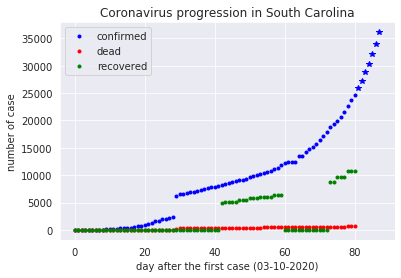

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5456786347607529.0, tolerance: 4692428677629.37
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2372292.7302582087, tolerance: 43167.496479999994
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8527048832838605e+18, tolerance: 3.325857010796171e+16
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase 

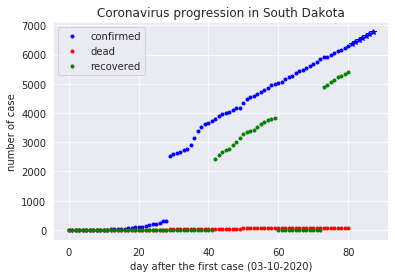

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.930672877093112e+17, tolerance: 829627677357182.8
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28307659.159543928, tolerance: 1004057.4465687501
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.309267898348132e+21, tolerance: 4.63758910047753e+19
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increas

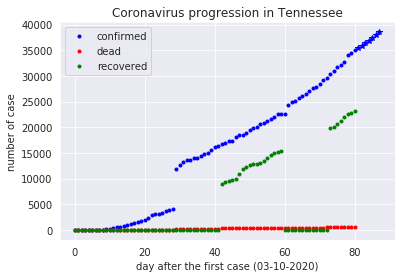

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.244181715190936e+19, tolerance: 8.350925696046317e+16
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202145439.82097578, tolerance: 9073903.13688875
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.703584976038833e+23, tolerance: 7.574491379620708e+21
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to incr

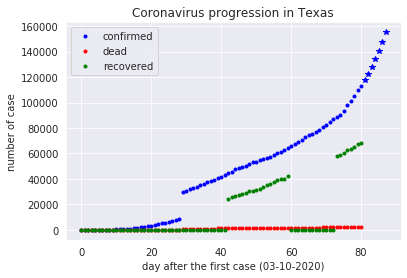

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7198182937300080.0, tolerance: 7869219134924.471
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4470228.387974458, tolerance: 217573.05506875002
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.594974280420119e+19, tolerance: 2.2130094711571756e+18
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase 

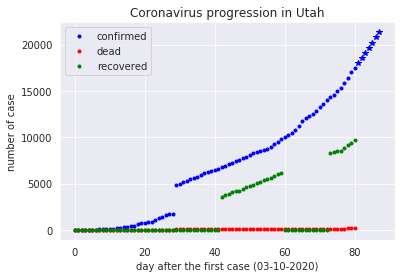

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137659044893574.14, tolerance: 144767385010.88947
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40442.86886300496, tolerance: 1354.64411875
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5401607477107142e+16, tolerance: 525222003641171.56
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the num

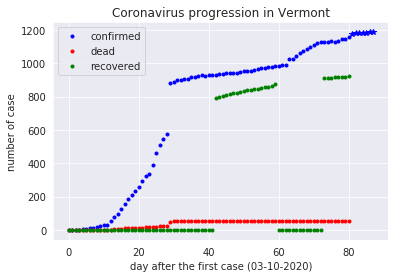

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.453155108056507e+18, tolerance: 2449197074746174.5
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86572481.41709486, tolerance: 3514100.8181800004
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.334206829927367e+21, tolerance: 2.53836718271897e+20
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increas

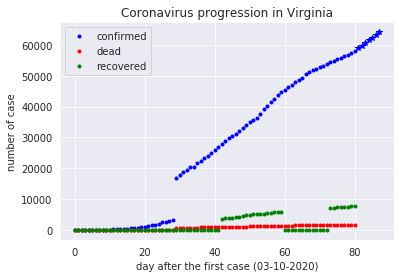

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7506139441771622e+17, tolerance: 198138792431072.06
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15585693.08436005, tolerance: 830345.2090112359
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.023783737479125e+22, tolerance: 4.0491016693670945e+19
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to incre

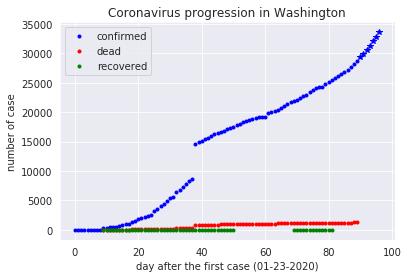

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.784954251173105e+16, tolerance: 16097688920122.1
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 256207.40505841954, tolerance: 6307.181688750001
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.175141141854131e+17, tolerance: 2.020528756473687e+16
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase

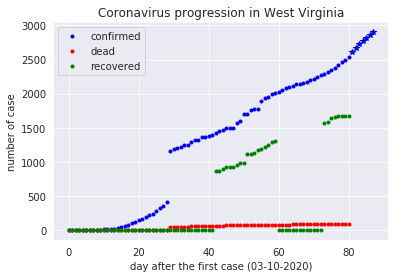

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.279540377129727e+17, tolerance: 315105166555857.2
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10592917.87549242, tolerance: 582625.42573875
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.598427575360034e+20, tolerance: 1.9583746670448935e+19
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase 

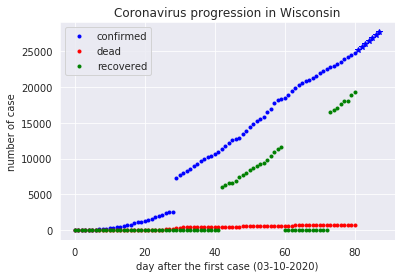

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 324565043242489.0, tolerance: 310190150133.95404
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57887.289736067825, tolerance: 1283.1996000000001
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9157302368097572e+16, tolerance: 427995374562884.94
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase th

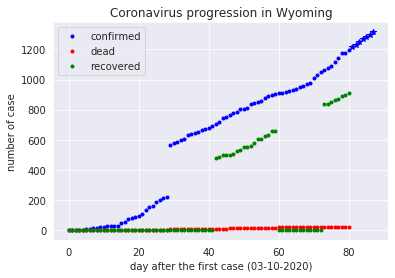

/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.577593588895759e+20, tolerance: 2.5496388472635232e+17
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  positive)
/home/okiss/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


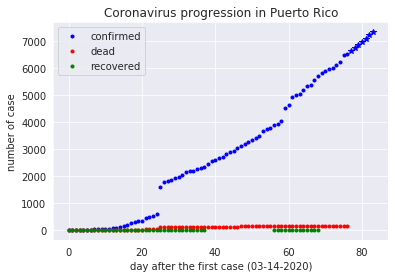

In [142]:
for l,state in enumerate(pop_us.index[5:]):
    data=np.array(us_data[state].fillna(0))
    X=data[:,:-1]
    X=X.T
    y=data[:,1:]
    y=y.T
    n=np.shape(X)[0]
    pred=[]
    pred.append(y[-1,:])
    for i in range(n):
        if y[i,1]> 2*X[i,1]:
            np.delete(X,i,0)
            np.delete(y,i,0)
    
    model={}
    new=np.zeros((5))
    cont=[]
    for i in range(5):
        model[i]=linear_model.ElasticNet(alpha=10)
        model[i].fit(X,y[:,i])
        new[i]=model[i].predict(y[-1,:].reshape(1,-1))
        if i==1:
            cont.append(new[i])
    pred.append(new)
    for j in range(6):
        new=np.zeros((5))
        for i in range(5):
            #model[i].fit(pred[-2].reshape(1,-1),pred[-1][i].reshape(1,-1))
            new[i]=model[i].predict(pred[-1].reshape(1,-1))
            if i ==1:
                cont.append(new[i])
        pred.append(new)
    
    prediction_2days_us['N'].iloc[l]=int(pred[2][1])
    prediction_2days_us['R'].iloc[l]=int(pred[2][3])
    prediction_2days_us['D'].iloc[l]=int(pred[2][4])
   
    prediction_7days_us['N'].iloc[l]=int(pred[-1][1])
    prediction_7days_us['R'].iloc[l]=int(pred[-1][3])
    prediction_7days_us['D'].iloc[l]=int(pred[-1][4])
    time=np.arange(np.shape(X)[0]+1)
    newtime=np.arange(np.shape(X)[0]+1,np.shape(X)[0]+8)
    plt.figure()
    plt.title('Coronavirus progression in '+state)
    plt.xlabel('day after the first case ('+us_data[state].columns[0]+')')
    plt.ylabel('number of case')
    plt.plot(time,us_data[state].iloc[1,:],'b.',label='confirmed')
    plt.plot(newtime,cont,'*b')
    plt.plot(time,us_data[state].iloc[4,:],'r.',label='dead')
    plt.plot(time,us_data[state].iloc[3,:],'g.',label='recovered')
    plt.legend()
    #plt.xlim()
    plt.show()
prediction_2days_us.to_csv('2day_prediction_'+subdate(today)+'.csv')
prediction_7days_us.to_csv('7day_prediction_'+subdate(today)+'.csv')

In [145]:
Artemiy2=pd.read_csv('2Day_prediction_'+subdate(today)+'.csv')
Artemiy2=Artemiy2.replace(np.nan, '', regex=True)
Artemiy30=pd.read_csv('30Day_prediction_'+subdate(today)+'.csv')
Artemiy7=pd.read_csv('7Day_prediction_'+subdate(today)+'.csv')
Artemiy7=Artemiy7.replace(np.nan, '', regex=True)
Oriel2=pd.read_csv('2day_prediction_'+subdate(today)+'.csv',index_col=0)
Oriel7=pd.read_csv('7day_prediction_'+subdate(today)+'.csv',index_col=0)
Auriel2=pd.read_csv('S2day_prediction_'+subdate(today)+'.csv',index_col=0)
Auriel2=Auriel2.replace(np.nan, '', regex=True)
Auriel7=Auriel7.replace(np.nan, '', regex=True)

Auriel2['Target/Date'].astype(str)
Auriel7['Target/Date'].astype(str)
print(Auriel2)
Auriel7=pd.read_csv('S7day_prediction_'+subdate(today)+'.csv',index_col=0)
Artemiy2['Target/Date'].astype(str)
Artemiy7['Target/Date'].astype(str)
Oriel2=pd.merge(Oriel2,Artemiy2,how='left')
Oriel7=pd.merge(Oriel7,Artemiy7,how='left')
#Oriel2=pd.merge(Oriel2,Auriel2,how='left')
#Oriel7=pd.merge(Oriel7,Auriel7,how='left')
Oriel2.to_csv('2day_prediction_'+subdate(today)+'.csv')
Oriel7.to_csv('7day_prediction_'+subdate(today)+'.csv')
Artemiy30.to_csv('30day_prediction_'+subdate(today)+'.csv')
print(Oriel2)

  Province/State      Country Target/Date      N    R     D
0                 Switzerland  2020-06-06  31398  435  1958
          Province/State Country Target/Date         N        R        D  \
0                Alabama      US  2020-06-24   31592.0  17857.0    860.0   
1                 Alaska      US  2020-06-24     770.0    475.0     15.0   
2                Arizona      US  2020-06-24   59742.0   8548.0   1395.0   
3               Arkansas      US  2020-06-24   16630.0  10694.0    241.0   
4             California      US  2020-06-24  188872.0      0.0   5705.0   
5               Colorado      US  2020-06-24   31550.0   4025.0   1723.0   
6            Connecticut      US  2020-06-24   45604.0   7300.0   4232.0   
7               Delaware      US  2020-06-24   10976.0   6160.0    439.0   
8   District of Columbia      US  2020-06-24   10205.0   1110.0    544.0   
9                Florida      US  2020-06-24  109852.0      0.0   3394.0   
10               Georgia      US  2020-06-24

In [144]:
print(Oriel2.columns)

Index(['Province/State', 'Country', 'Target/Date', 'N', 'R', 'D', 'low95N',
       'high95N', 'low95R', 'high95R', 'low95D', 'high95D', 'T', 'low95T',
       'high95T', 'M', 'low95M', 'high95M', 'C', 'low95C', 'high95C'],
      dtype='object')
